In [89]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [90]:
raw_spy_data = pd.read_csv("data5_SPY.csv", header=0, index_col=0)
data = raw_spy_data.copy()

In [91]:
data.index = pd.to_datetime(data.index)
data= data.asfreq('b')
data= data.ffill()
data.loc["2021"].mean()

C:\Users\wilfo\AppData\Local\Temp\ipykernel_32864\305024496.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data.index = pd.to_datetime(data.index)


Open         4.257463e+02
High         4.277203e+02
Low          4.236387e+02
Close        4.259510e+02
Adj Close    4.227260e+02
Volume       7.364414e+07
dtype: float64

In [92]:
data.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1994-01-03,46.59375,46.65625,46.40625,46.46875,27.784529,960900.0
1994-01-04,46.53125,46.65625,46.46875,46.65625,27.896648,164300.0


In [93]:
#always use adjusted close
col = ['Adj Close', 'Volume']
data =data[col]
data.columns =['spy_price', 'spy_vol']
data.head(2)


,spy_price,spy_vol
Date,,
1994-01-03,27.784529,960900.0
1994-01-04,27.896648,164300.0


<Axes: title={'center': 'Spy Price'}, xlabel='Date'>

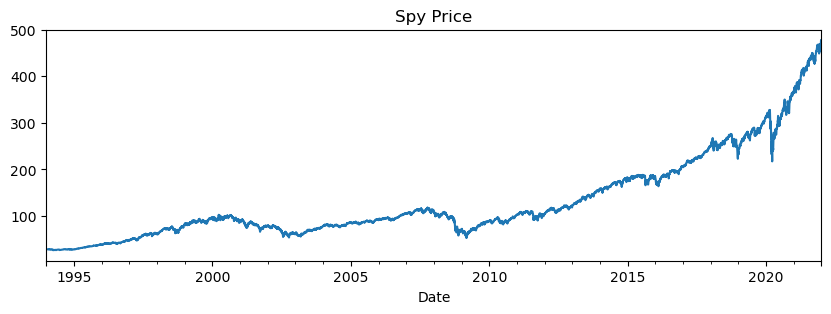

In [94]:
data.spy_price.plot(figsize=(10,3), title= "Spy Price")

<Axes: xlabel='Date'>

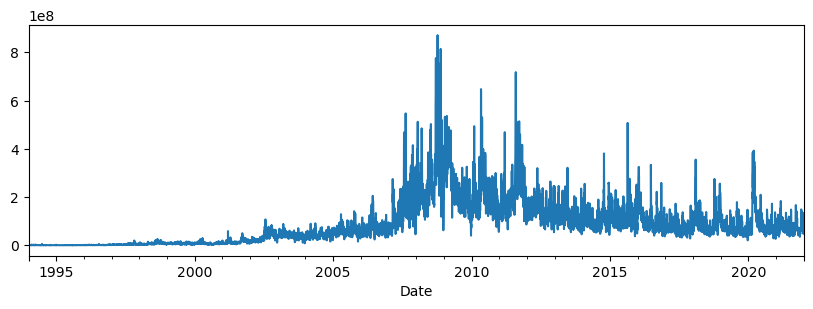

In [95]:
data.spy_vol.plot(figsize=(10,3))

In [96]:
from statsmodels.tsa.seasonal import seasonal_decompose

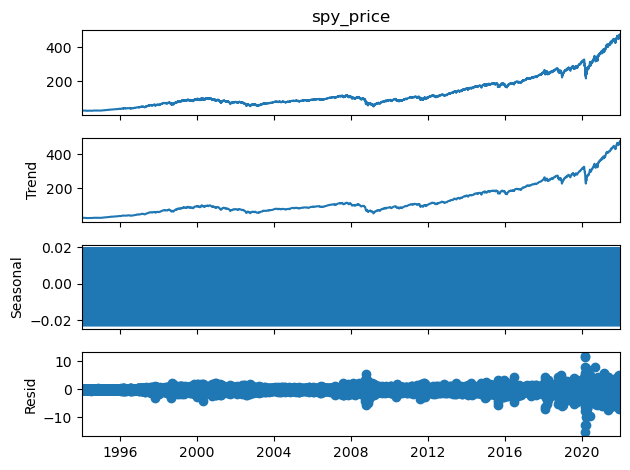

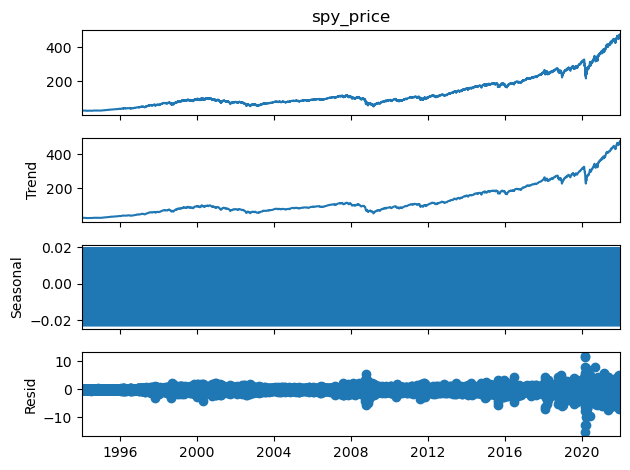

In [97]:
decomp_spy = seasonal_decompose(data.spy_price, model="additive")
decomp_spy.plot()

C:\Users\wilfo\AppData\Local\Temp\ipykernel_32864\217083483.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  unemp.index = pd.to_datetime(unemp.index)


<Axes: xlabel='DATE'>

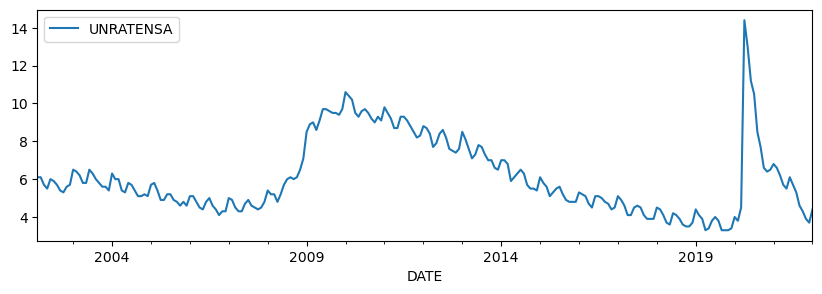

In [98]:
unemp = pd.read_csv("data5_UNRATENSA.csv", header=0, index_col=0)
unemp = unemp[-240:]
unemp.index = pd.to_datetime(unemp.index)
unemp.plot(figsize=(10,3))

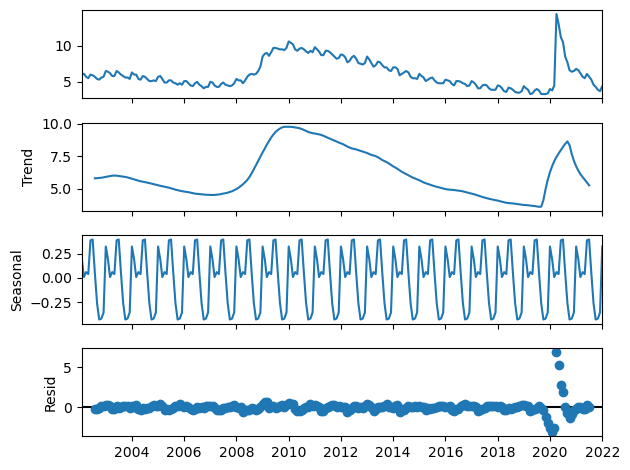

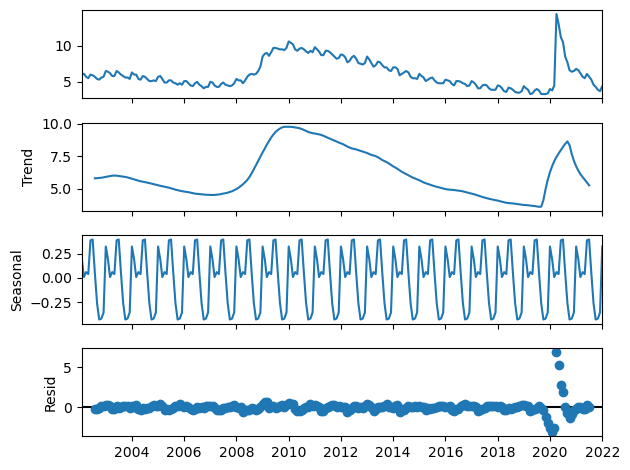

In [99]:
decomp_unemp = seasonal_decompose(unemp)
decomp_unemp.plot()

In [100]:
#white noise process.
wn = np.random.normal(loc= data.spy_price.mean(), scale=data.spy_price.std(), size=len(data))

In [101]:
data['wn'] = wn
data.head(2)

,spy_price,spy_vol,wn
Date,,,
1994-01-03,27.784529,960900.0,133.395082
1994-01-04,27.896648,164300.0,236.864864


<Axes: xlabel='Date'>

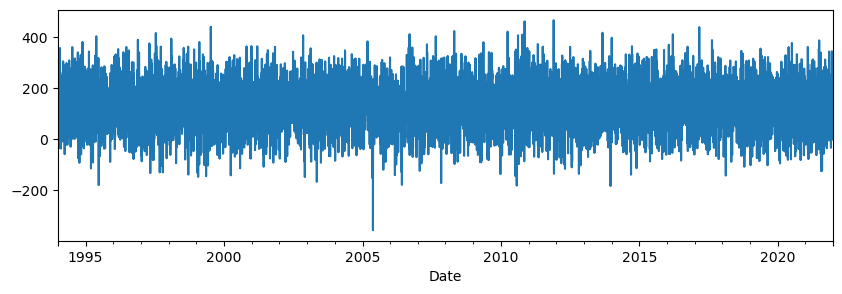

In [102]:
data.wn.plot(figsize=(10,3))

In [103]:
wn_rw=np.random.normal(loc=0, scale=0.05, size=len(data))
rw= np.zeros(len(data))
data['rw']=rw
data['wn_rw']=wn_rw

In [104]:
data.head(3)

,spy_price,spy_vol,wn,rw,wn_rw
Date,,,,,
1994-01-03,27.784529,960900.0,133.395082,0.0,0.046016
1994-01-04,27.896648,164300.0,236.864864,0.0,0.030108
1994-01-05,27.952698,710900.0,300.590219,0.0,-0.006399


In [105]:
data.rw.iloc[0] =27

for i in range(1, len(data)):
    data.rw.iloc[i] = data.rw.iloc[i-1] + data.wn_rw.iloc[i]

data.head(3)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



,spy_price,spy_vol,wn,rw,wn_rw
Date,,,,,
1994-01-03,27.784529,960900.0,133.395082,27.000000,0.046016
1994-01-04,27.896648,164300.0,236.864864,27.030108,0.030108
1994-01-05,27.952698,710900.0,300.590219,27.023710,-0.006399


In [106]:
data.rw.iloc[0] =27 
for i in range(1,len(data)):
    data.rw.iloc[i]=data.rw.iloc[i-1]+ data.wn_rw.iloc[i]
data.head(3)

C:\Users\wilfo\AppData\Local\Temp\ipykernel_32864\3975931652.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data.rw.iloc[0] =27
C:\Users\wilfo\AppData\Local\Temp\ipykernel_32864\3975931652.py:3: FutureWarning: ChainedAssignmentError: be

,spy_price,spy_vol,wn,rw,wn_rw
Date,,,,,
1994-01-03,27.784529,960900.0,133.395082,27.000000,0.046016
1994-01-04,27.896648,164300.0,236.864864,27.030108,0.030108
1994-01-05,27.952698,710900.0,300.590219,27.023710,-0.006399


<Axes: xlabel='Date'>

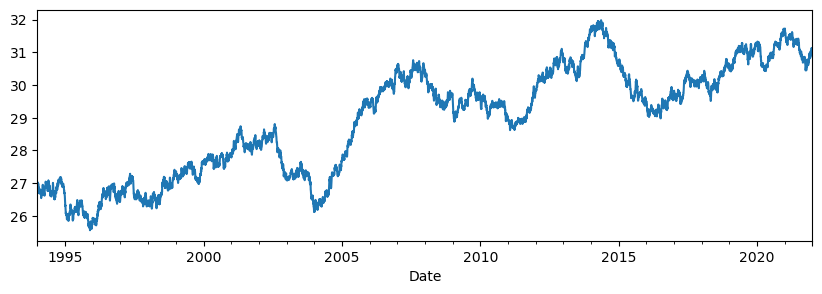

In [107]:
data.rw.plot(figsize = (10,3))

In [108]:
import statsmodels.tsa.stattools as sts

In [109]:
print(data.columns)


Index(['spy_price', 'spy_vol', 'wn', 'rw', 'wn_rw'], dtype='object')


In [110]:
print(data.head())


            spy_price   spy_vol          wn         rw     wn_rw
Date                                                            
1994-01-03  27.784529  960900.0  133.395082  27.000000  0.046016
1994-01-04  27.896648  164300.0  236.864864  27.030108  0.030108
1994-01-05  27.952698  710900.0  300.590219  27.023710 -0.006399
1994-01-06  27.952698  201000.0  117.123126  26.997557 -0.026153
1994-01-07  28.120859  775500.0   81.529802  26.973036 -0.024520


In [111]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['spy_price'])  # Ensure correct column reference
print(result)


(4.6494140754734135, 1.0, 34, 7269, {'1%': -3.431249932695256, '5%': -2.86193770026569, '10%': -2.5669816916268466}, 27985.76652116109)
